In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
##read csv
df = pd.read_csv("google_stock_data.csv")
df.head()
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.columns
#this will show all the columns present in dataset

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#details about dataset

In [23]:
df.info()
#it will show the details about colums which type of data is present in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563 entries, 0 to 3562
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3563 non-null   datetime64[ns]
 1   Open       3563 non-null   float64       
 2   High       3563 non-null   float64       
 3   Low        3563 non-null   float64       
 4   Close      3563 non-null   float64       
 5   Adj Close  3563 non-null   float64       
 6   Volume     3563 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 195.0 KB


In [24]:
df.describe()
#it will show some basic description of data present in column

,Date,Open,High,Low,Close,Adj Close,Volume
count,3563,3563.000000,3563.000000,3563.000000,3563.000000,3563.000000,3.563000e+03
mean,2017-01-29 17:24:44.254841088,55.111820,55.680919,54.551089,55.130651,55.130651,5.790185e+07
min,2010-01-04 00:00:00,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,2013-07-18 12:00:00,22.022022,22.191566,21.886762,22.029530,22.029530,2.825300e+07
50%,2017-01-31 00:00:00,41.549999,41.861500,41.264999,41.502998,41.502998,3.918000e+07
75%,2020-08-13 12:00:00,75.498249,76.180252,74.898251,75.608002,75.608002,7.620971e+07
max,2024-02-29 00:00:00,152.800003,153.779999,151.429993,153.509995,153.509995,5.923990e+08
std,NaN,40.007556,40.473193,39.569487,40.031109,40.031109,4.825828e+07


#Q1 how are the values distributed across numerical columns


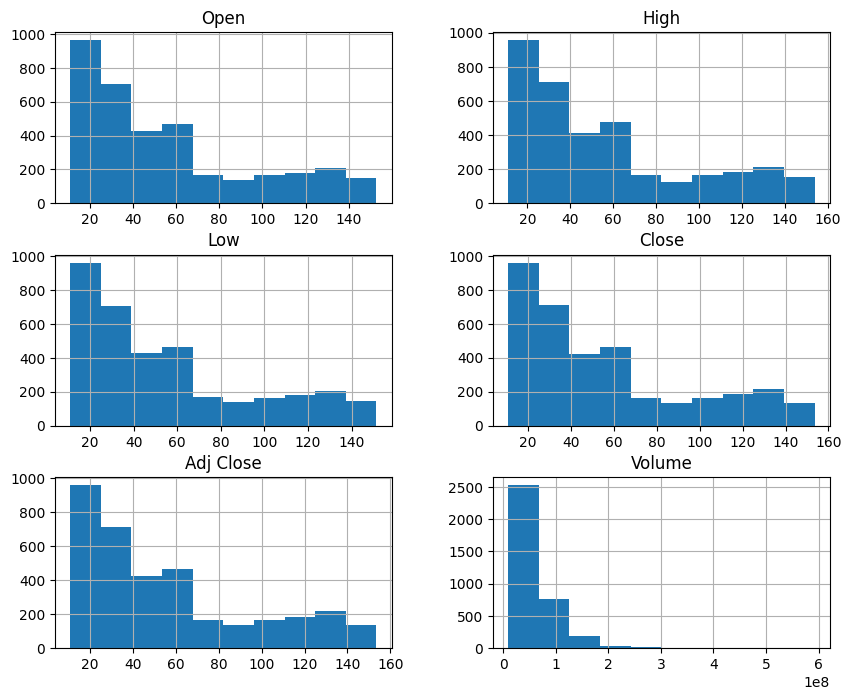

In [30]:
df.hist(figsize=(10,8))
plt.show()

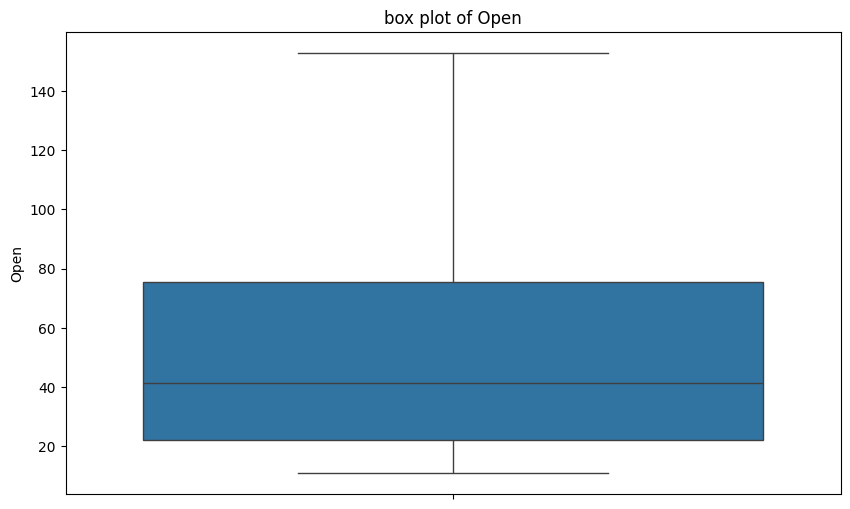

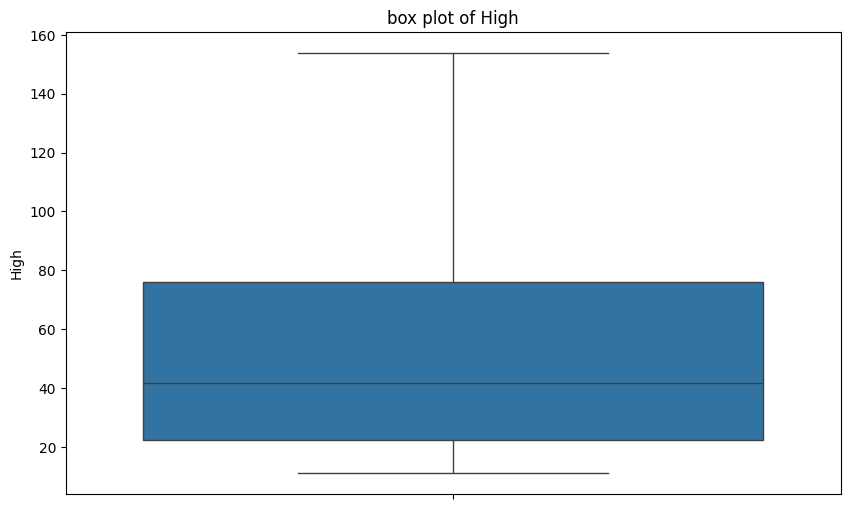

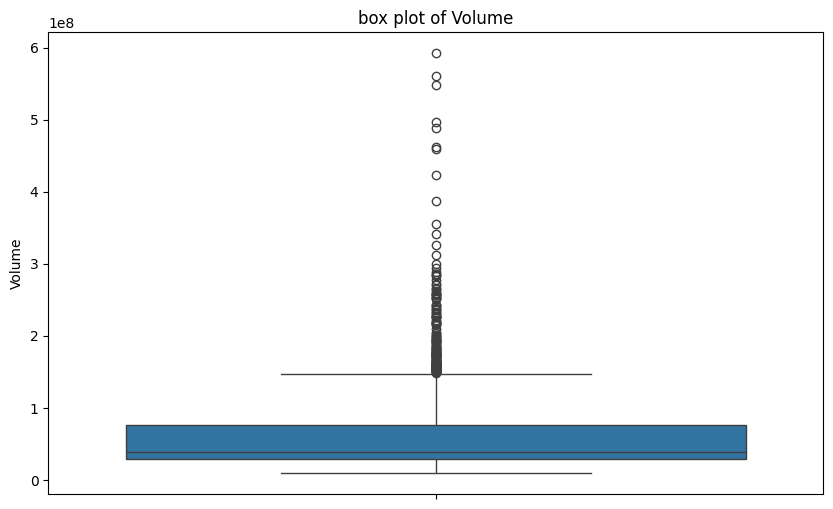

In [31]:
#box plot
for column in ['Open','High','Volume']:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[column])
  plt.title(f"box plot of {column}")
  plt.show()

#Q2. what are the the corelations between stock metrices?

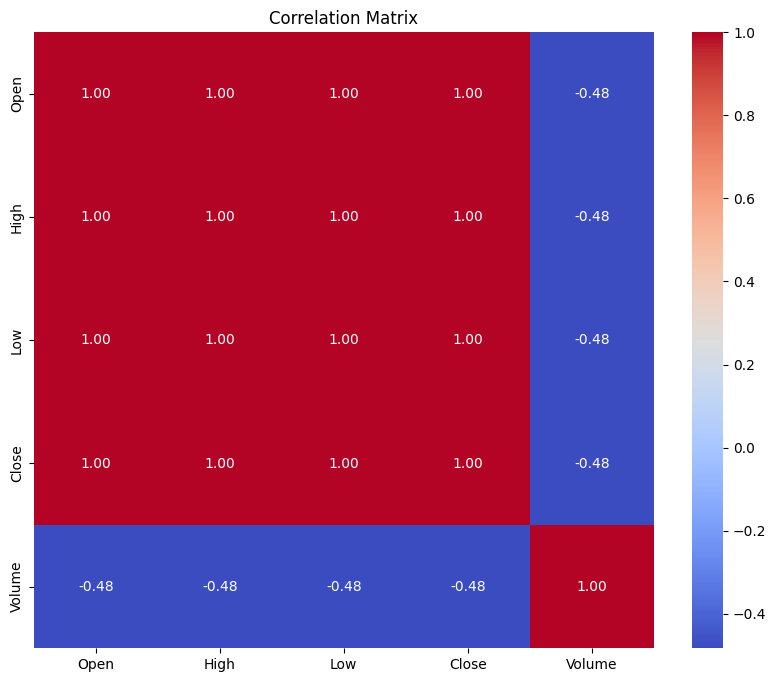

In [27]:
# Calculate correlation matrix
correlation_matrix = df[['Open','High','Low','Close','Volume']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#Q3. how the stock prices change over time?




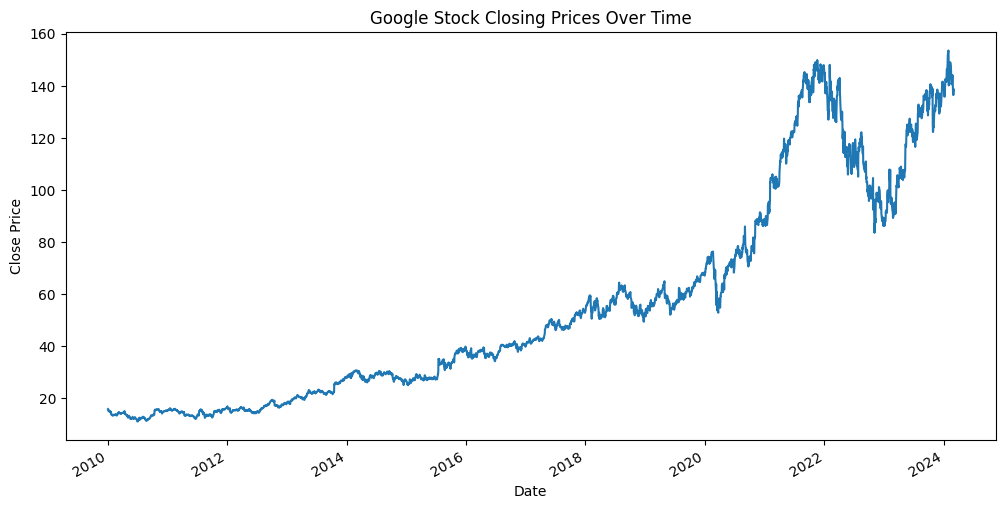

In [28]:
# Plot time series for closing prices
plt.figure(figsize=(12, 6))
df.set_index('Date')['Close'].plot()
plt.title('Google Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

#Q4.how the stock metrices vary across different timestamp like monthly

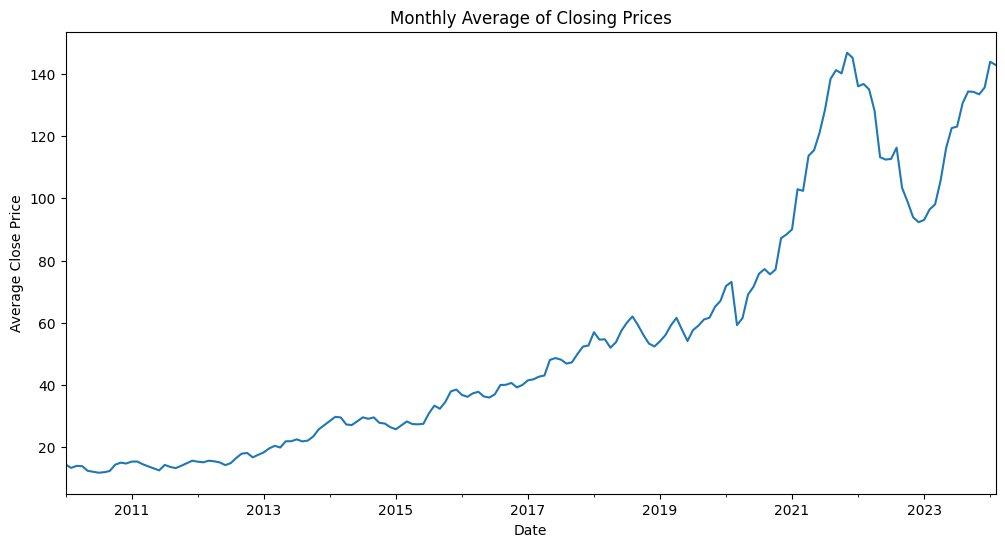

In [29]:
# Set Date as index and resample by month
df.set_index('Date', inplace=True)

# Calculate monthly average
monthly_avg = df[['Open', 'High', 'Low', 'Close', 'Volume']].resample('M').mean()

# Plot monthly average closing prices
plt.figure(figsize=(12, 6))
monthly_avg['Close'].plot()
plt.title('Monthly Average of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.show()